# Open3DFlow: An Open Source 3D Chip EDA Design Platform with TSV and Thermal Modeling

RIOS Lab, TsingHua University, 2024

SPDX-License-Identifier: Apache-2.0

</br>

#### Team Members

|Name|Affiliation|
|:--:|:----------:|
| Yifei Zhu (zhuyf20@mails.tsinghua.edu.cn)| RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|
| Weiwei Chen (weiwei.c@rioslab.org)| RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|
| Lei Ren (ren@rioslab.org)| RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|
| Xieyuan Wu (wuxy23@mails.tsinghua.edu.cn)| RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|
| Yucheng Wang (wangyc23@mails.tsinghua.edu.cn)| RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|


## Abstract
Amidst the escalating demand for high-performance, low-power, and densely integrated electronic systems, the significance of 3D IC technology has become paramount. However, the dearth of tools dedicated to 3D IC design, particularly a fully open-source platform, poses a significant barrier to silicon innovation. To bridge this gap, we introduce Open3DFlow, a comprehensive open 3D IC design methodology. This platform leverages the open-source EDA tool OpenRoad and extends it with custom modifications and enhancements to cater to the unique needs of 3D chiplets design process. We also integrate other open toolchains to enable through Silicon Via (TSV) modeling, thermal analysis, and signal integrity (SI) assessments. To showcase the utility and impact of Open3DFlow, we demonstrate its availability by hardening a RISC-V chip with a staking SRAM architecture. Open3DFlow is an unprecedented attempt to explore the frontiers of the next generation of technology,aiming to foster a collaborative ecosystem for silicon innovation.

## Introduction
In the realm of microelectronics, the quest for enhanced performance, reduced power consumption, optimized area utilization, and cost-effective solutions has led to the emergence of innovative integration techniques.

The technological path of packaging can be roughly divided into four stages:
- Flip Chip Packaging, with solder balls or bumps as the representative connection method.
- Wafer Level Packaging, utilizing Redistribution Layer (RDL) as the representative connection approach.
- 2.5D package, typically based on interposer or Embedded Multi-die Interconnect Bridge (EMIB).
- 3D stacking, employing hybrid bonding and Through Silicon Vias (TSVs) for signal and power transmission.

As depicted in the following diagram, the trend consistently leans towards achieving greater integration and shorter interconnection distances:

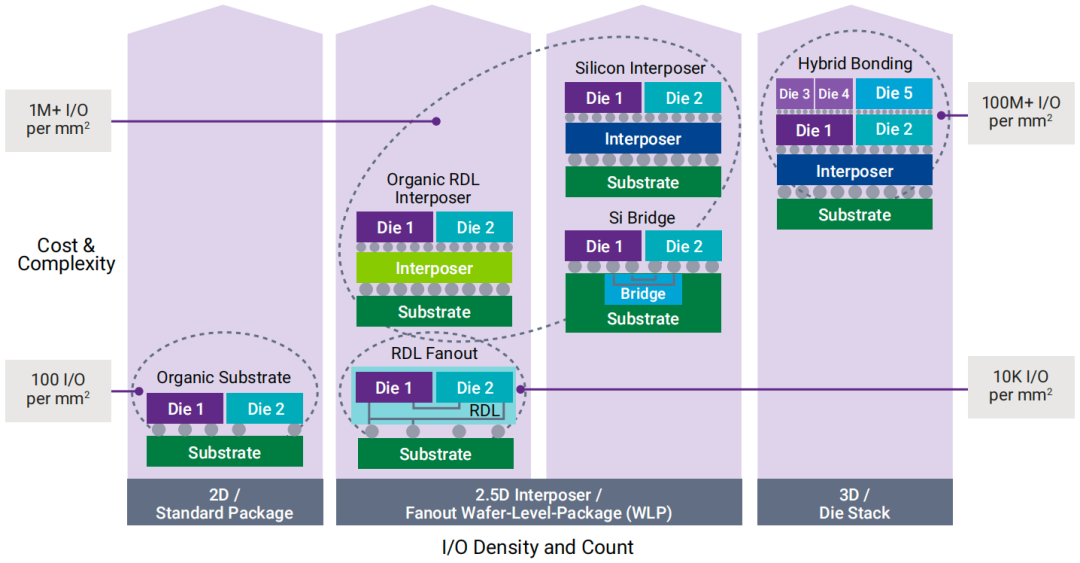

Currently, the 3D IC flow faces several limitations. Primarily, it relies heavily on 2D tools and lacks comprehensive thermal analysis as well as power and signal integrity (SI) assessments tailored for TSVs. Due to the immature and closed nature of existing 3D design EDA tools, future designs face challenges in integrating with large models and cloud platforms. Commercial licensing costs and limitations on processor scalability in cloud environments further complicate the matter. To address these issues, we aim to develop a fully open-source 3D IC design flow: Open3Dflow. We incorporate openPDKs and stacking SRAM architectures while hardening a RISC-V CPU to demonstrate its potential. Our aim is to tape out this design through the OpenMPW program, and the process can be easily extended to include logic+DRAM or logic+logic configurations.

The significance of the Open3DFlow can be summarized:
- It’s the first fully open-source 3D IC platform, leveraging open EDA tools and openMPW, incorporating advanced hybrid bonding technologies.
- It offers comprehensive TSV integrity and thermal analysis, ensuring reliable and efficient 3D IC designs
- The open-source nature facilitates seamless integration with AI, large models, and cloud computing, boosting design efficiency for complex 3D ICs.

Next, we will demonstrate the operations step by step with this article. For quick start of our flow, you can turn to section [Simulation Flow](#Simulation_Flow)

## Related Works
### 3D architecture for processors
There are some typical structures for 3D processors. As depicted in the following figures:

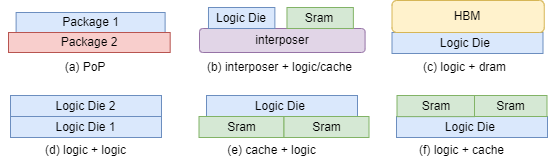

(a) depicts combinations of multiple packages; (b) represents 2.5D IC, applying passive or active interposers; (c) illustrates for DRAMs on logic dies; (d) stacks one logic circuit on another; and in (d), SRAMs are positioned beneath the logic but for (f), the logic is on the upper side. However, modern 3D processor architectures often combine multiple stacking approaches. The overall trend in 3D architecture development is towards higher density integration, smaller micro-bumps and TSV pitches, and closer chiplet distances. Like that in AMD 3D-vcache and MI300x, there are even no bumps within the hybrid bonding technology. In this work, we have chosen the structure of "CPU + Caches'' for experimentation. We hope that Open3DFlow can be flexibly extended to other modes in the future.

### 3D IC design tool flow
There is limited work that summarizes a general 3D IC design flow encompassing all EDA tools and their sequential order along the pipeline. This is primarily due to the fragmented nature of chip production, where different stages are often contracted out to different third-party vendors, leading to knowledge gaps. Furthermore, the successful production of advanced 3D chips necessitates constant communication and collaboration between chip design companies and packaging fabs. Given these complexities, it is challenging to develop a generalized roadmap that applies universally. Moreover, the 3D designs cannot simply adopt the 2D , as there are significant differences：
 - Modeling and analysis of unique components specific to 3D designs
 - The abstraction of routing between two dies with different back-end-of-line (BEOL) process
 - Thermal and SI analysis for stacking architectures.


We have explored eclectic methods such as Shrunk-2-D (S2D), Compact-2D (C2D), Macro-3D (M3D), and Hier-3D (H3D). Although they have yielded promising results, they lack validation through the actual design of a 3D processor. Beyond that, the mainstream approach in 3D ICs involves the utilization of TSV and hybrid bonding, which are not accounted for in the aforementioned works regarding their delay and RC characteristics. Additionally, a crucial aspect of 3D design is thermal management, where thermal simulations play a pivotal role, beyond merely emphasizing RTL-to-GDS as the entire workflow. Furthermore, the tools employed in these works are not open-source, hindering rapid iteration.

### Open EDA and PDK ecosystem
The increasing adoption of public toolchains represents a pivotal moment for semiconductor innovation. By harnessing the strengths of open source projects, traditional EDA licenses no longer pose a constraint on design space exploration. A prime example of an OpenEDA tool is OpenRoad, which accepts RTL Verilog, constraints (.sdc), liberty (.lib), and technology (.lef) files as inputs and strives to generate a tapeout-ready GDSII file. While OpenFOAM is a famous open source CFD software which can emulate heat transfer across thin solid structures. Additionally, OpenEMS can provide a fully functional and open source alternative to proprietary electromagnetic simulation softwares.

OpenPDKs such as Sky130, GF180, and ASAP7 offer users vast possibilities in exploring the hardware domain. Previous successes, such as Greenrio’s demonstration of a fully open-source CPU tapeout, have shown their feasibility and competitiveness.

Looking ahead, the hardware open source ecosystem is poised for significant growth, with a focus on integrating AI large models and accelerating multi-processors on cloud platforms. However, in the realm of 3D ICs, a comprehensive open-source design flow is still lacking. We aim to close this gap by developing a comprehensive open-source 3D IC design platform that seamlessly integrates the entire open-source tool chain, thereby further contributing to the expansion of the open-source ecosystem.


## Open3DFlow
### Flow infrastructure
Open3DFlow integrates a range of open-source tools and provides apt abstractions, augmented with specialized modules designed to simulate the 3D structure of hybrid bonding. Notably, the 2D backend of the chip leverages certain components from the existing workflow in OpenRoad.

The overall workflow of Open3DFlow is depicted in this figure:

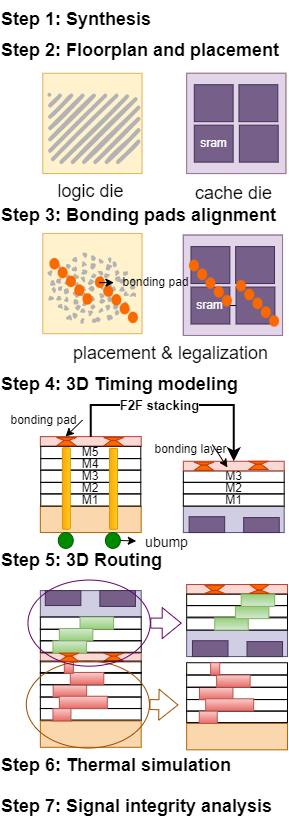

In the initial phase, we synthesize the RTL codes of the processor to generate netlists. The logic and cache are synthesized using distinct PDKs.


Subsequently, we proceed to do floorplanning of both dies. The footprints of the two dies must be aligned with each other.


The next step involves the placement of standard cells and bonding pads. A key aspect of hybrid bonding is its transition from solder-based bump technology to direct copper-to-copper connections. So we introduce a dedicated 'bonding layer' for bonding pads. However, by modifying the technology file of the full metal stack can introduce complexities in Design Rule Check (DRC) rules and RC extraction schedules. To maintain a reasonable face-to-face (F2F) stacking structure, the top layer of the cache die serves as the bonding layer. Consequently, for the cache die, this metal layer is not allowed for routing. Simultaneously, this bonding layer is integrated into the metal stack of the logic die. We have extracted the RLC characteristics and related dimensions of two die's all metal layers to construct the 3D chips' full BEOL. Compared to M3D, this approach simplifies modifications to the logic die's tlef, as we do not require actual routing on the bonding layer, just sacrificing the routing resources of the cache die.


Besides, the placement and legalization of stand cells are also involved at this stage, ensuring that the bonding pads of both dies align automatically.


Then, we model the delays and impedances introduced by 3D items such as bumps, TSVs, and bonding pads. The TSVs connect the upper bonding pads to the bumps, which interface with the redistribution layers (RDL) or package substrate. Delays can be abstracted and concentrated at their IOs. Detailed modeling will be discussed in the next section.


Next, the logic die and cache die are routed separately to obtain the final GDSII files. Although routing is performed individually for each die, the alignment of bonding pads, the parasitic parameters and time delays for 3D structure, obtained in the previous step, validate this flow for the final F2F-stacked 3D chip architecture.


In the last two steps, we perform thermal simulation and SI analysis based on chip dimensions, power consumption, and other relevant parameters. Thermal simulations allow us to accurately assess the heat distribution within the chip, enabling us to optimize the cooling system. Additionally, the SI analysis helps identify potential electromagnetic interference issues.


### Key Steps for Open3DFlow
Open3DFlow incorporates a range of EDA tools tailored for distinct stages of the design process. As shown in the following figure：

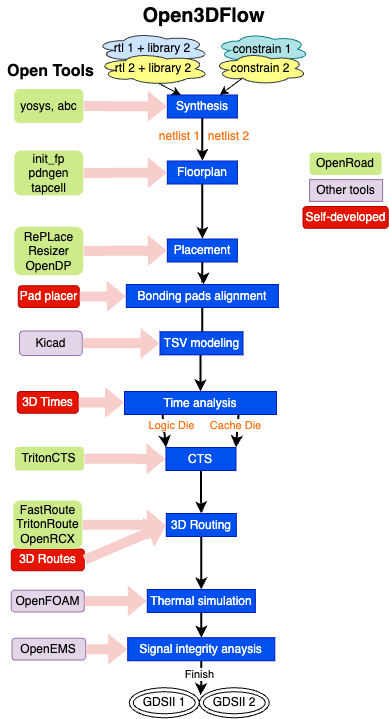

Within green boxes are existing open-source tools/algorithms such as Yosys and RePlace, which have been integrated into OpenRoad. The purple boxes represent the new open-source EDA tools we add to our design process. While the red boxes highlight our self-developed modules: Pad placer generates a bonding layer, placing bonding pads and ensuring alignment between two tiles; 3D Times extracts the delay introduced by TSVs, incorporating it into the subsequent CTS process. Additionally, the route helper manages routing connections between metal layers and bonding pads, while also extracting parasitic parameters associated with the chiplets. We have tegrated all of them into our docker environment and source codes.

To sum up, Open3DFlow offers a comprehensive framework for 3D IC design, ensuring both compatibility with existing open-source solutions and the integration of novel, custom-designed components.

## TSV Modeling and Simulation
### Parasitic extraction
We extracted parasitic parameters based on chips' geometric dimensions and material properties of the TSV structure. In this model, copper is chosen as the filling metal, and the relevant structure and parameters are depicted in this figure:

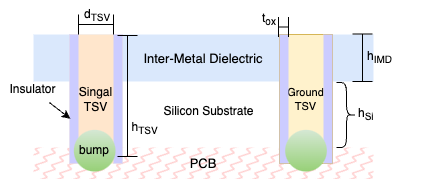

The parasitic resistance $R_{TSV}$ consists of two components: the direct-current resistance $R_{dc,TSV}$ and the alternating-current resistance $R_{ac,TSV}$. The former one follows Ohm's law, while the other is determined by skin depth and proximity effect:
$$R_{TSV}=\sqrt{R_{dc,TSV}^2 + R_{ac,TSV}^2}$$

The external inductance $L_{ex,TSV}$ arises from the electromagnetic fields present in the dielectric region, making it dependent solely on the geometry of the interconnect and the dielectric material. The internal inductance $L_{ex,TSV}$ is related to the distribution of current within the conductor. The total inductance can be calculated by relevant literatures, where $\delta$ represents the correction term accounting for skin effect and proximity effect:
$$L_{TSV}=\frac{h_{TSV}}{2} + \delta$$
Finally, we calculate the insulator capacitance $C_{insulator}$ by the coaxial capacitance formula  $f(h_{insulator}, d_{TSV}, t_{ox})$

### Timing Analysis for 3D Processors
We have developed a symmetric H-type equivalent circuit model, as depicted in this figure, which incorporates both signal TSVs and ground TSVs:

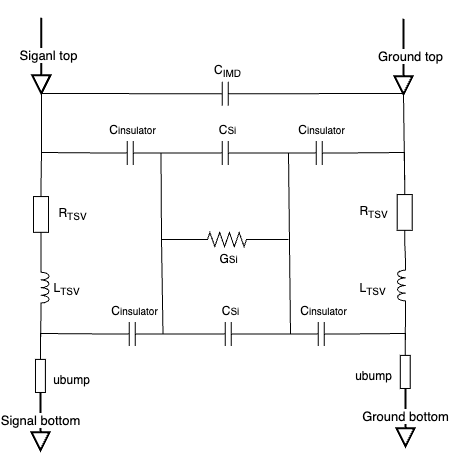

Due to the conductivity of the substrate material, $C_{si}$ and $G_{si}$ represent the parasitic capacitance and conductance, respectively, arising from electric field coupling. Additionally, $C_{IMD}$ is the capacitance of the metal interconnect layer, and $C_{RDL}$ denotes the parasitic capacitance of RDL interconnections. In this model, we solely consider the impedance contributed by the bumps.


#### spice simulation in kicad
We perform spice simulations utilizing Kicad.

    (ps: Kicad has been integrated into our environment but we cannot open its gui in this notebook, so we just put the code and simulation results here):

In [1]:
%%writefile tsv.spice
## take frequency of 80Mhz for example
.title KiCad schematic
.save all
.probe alli
.probe p(C_insulator3)
.probe p(C_insulator4)
.probe p(R_TSV3)
.probe p(L_TSV2)
.probe p(R_TSV4)
.probe p(V2)
.probe p(C_insulator2)
.probe p(L_TSV1)
.probe p(R_TSV1)
.probe p(C_insulator1)
.probe p(V3)
.probe p(R_TSV2)
.probe p(C_IMD1)
.probe p(C_Si1)
.probe p(C_RDL1)
.probe p(R_Si1)
.tran 31.25p 12.5n 0
C_insulator3 unconnected-_C_insulator3-Pad1_ Net-_C_IMD1-Pad2_ 164.343f
C_insulator4 Net-_C_RDL1-Pad2_ Net-_C_insulator4-Pad2_ 164.343f
R_TSV3 Net-_C_IMD1-Pad2_ unconnected-_R_TSV3-Pad2_ 0.00347282
L_TSV2 Net-_C_insulator4-Pad2_ Net-_L_TSV2-Pad2_ 6.19242p
R_TSV4 unconnected-_R_TSV4-Pad1_ GND 0.03
V2 Net-_C_IMD1-Pad2_ GND PULSE( 0 1.8 0n 0n 0n 6.25n 12.5n )
C_insulator2 Net-_C_insulator2-Pad1_ Net-_C_RDL1-Pad1_ 164.343f
L_TSV1 Net-_C_insulator2-Pad1_ Net-_L_TSV1-Pad2_ 6.19242p
R_TSV1 Net-_C_IMD1-Pad1_ Net-_L_TSV1-Pad2_ 0.00347282
C_insulator1 Net-_C_IMD1-Pad1_ Net-_C_RDL1-Pad1_ 164.343f
V3 unconnected-_V3-Pad1_ GND PULSE( 0 1.8 0n 0n 0n 6.25n 12.5n )
R_TSV2 unconnected-_R_TSV2-Pad1_ GND 0.03
C_IMD1 unconnected-_C_IMD1-Pad1_ Net-_C_IMD1-Pad2_ 4.11862e-16
C_Si1 Net-_C_RDL1-Pad1_ Net-_C_RDL1-Pad2_ 1.27899f
C_RDL1 Net-_C_RDL1-Pad1_ Net-_C_RDL1-Pad2_ 2.79443e-16
R_Si1 Net-_C_RDL1-Pad1_ Net-_C_RDL1-Pad2_ 27188
.end

Writing tsv.spice


Signal delay detection is determined by a threshold set at 90\% of its peak value. The figures and table exhibit the delay profiles for signal frequencies spanning from 25MHz to 2GHz, where the normalized delay signifies the proportion of delay to the time period:

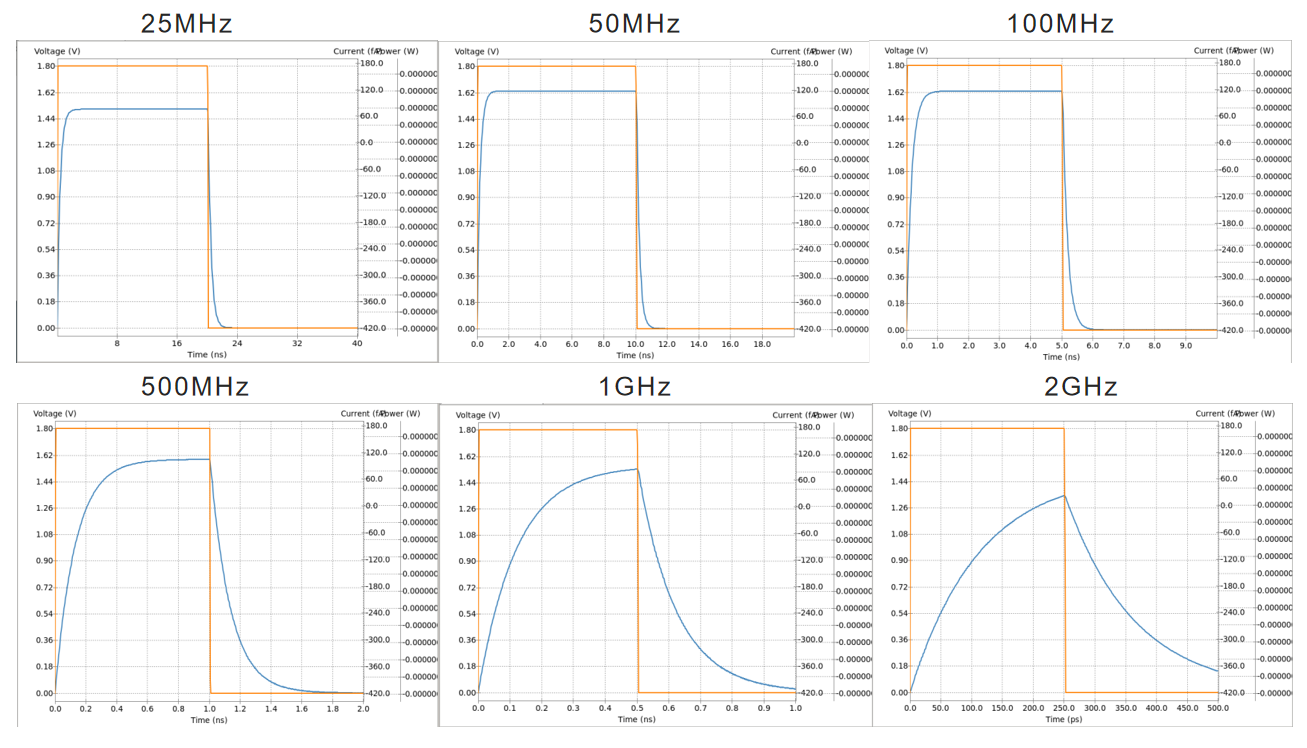

| Frequency （Hz） | Time period (ns) | Delay(ns) | Normalized Delay |
| ---------------- | ---------------- | --------- | ---------------- |
| 25M              | 40               | 0.60      | 0.015            |
| 50M              | 20               | 0.45      | 0.023            |
| 80M <-our design | 12.5             | 0.41      | 0.03             |
| 100M             | 10               | 0.40      | 0.04             |
| 500M             | 2                | 0.30      | 0.15             |
| 1G               | 1                | 0.26      | 0.26             |
| 2G               | 0.5              | 0.18      | 0.36             |

Notably, as the frequency increases, the delay introduced by TSV becomes increasingly significant, particularly exceeding one-third of the entire signal duration for frequencies above Ghz.

We have integrated the corresponding delays into our design flow by 3D times, ensuring that subsequent steps such as CTS and routing take into account the influencing factors of TSVs.

## Open RISC-V CPU with 3D stacking SRAM
### Architecture
In this work, we present the design of a RISC-V CPU with a 1kB L1 cache, serving as a demonstration of our 3D design flow. This CPU features a 5-stage pipelined 32-bit architecture and utilizes the SkyWater130A PDK.

Its cache is constructed by tiling four GlobalFoundries 180um SRAM macros. For timing closure, we consider multiple process corners, ultimately performing the closure at the typical one.

The overall stacked architecture is illustrated in this figure:

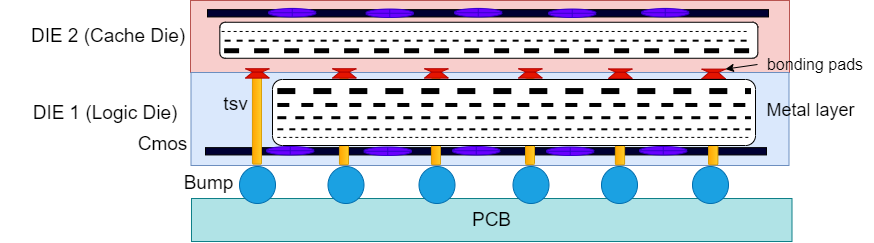

We initially conducted floorplan and placement for the two dies, ensuring that they maintain identical footprints. Within the Pad placer, we integrated a bonding layer into both dies by adjusting the BEOL processes files. This involved the placement of bonding pads, whose positions were determined based on routability considerations, also aiming to minimize the total wire length. It is noteworthy that, in a practical 3D stacking structure, both dies share a common bonding layer. However, for the purposes of subsequent routing and timing optimization, we temporarily simulate them separately.

In the 3D times module, we incorporated the delays obtained from the TSV simulations into the subsequent CTS step. Subsequently, 3D routes were employed to perform routing operations for each die individually. As mentioned in Section III, the bonding layer was created referenced to the top metal layer of the cache die. Consequently, for the cache die, the highest metal layer available for routing is actually its second-highest layer. This modification is justifiable as it solely compromises the routing resources of the cache die, necessitating only minimal changes to the technology files and rules pertaining to the logic die.

Finally, the routing endpoints for both dies converge at the bonding layer, where the power stripe is situated to provide power to both dies simultaneously. This approach ensures a logical and scientifically sound integration of the two dies, optimizing wire lengths, timing, and power delivery in a 3D stacked architecture.

<a id="Simulation_Flow"></a>
## Simulation Flow
In this section, we will demonstrate how to conduct simulations to replicate our results.

Our platform is based on **OpenRoad-Flow-Scripts**, but the modifications made to the tools are considerable, thus inconvenient to be placed here. We have uploaded the environments and source codes to our Docker Hub and GitHub for public access.

#### 1. Pull the environment

First you should install docker for your own os (Docker cannot run in Colab)

In [2]:
# install docker 

zsh:1: command not found: apt-get


In [3]:
!docker pull b224hisl/hahaha:latest #For it's about 15GB, it may take a while
!docker tag b224hisl/hahaha test # rename your environment

latest: Pulling from b224hisl/hahaha
Digest: sha256:7a57ee701e317d0ed0588a0114b65e18fb146b07d5d1a3b1876c49ea46b11544
Status: Downloaded newer image for b224hisl/hahaha:latest
docker.io/b224hisl/hahaha:latest


#### 2. Clone our source code
   The codes include: riscv32i RTL, gf180 sram marco file, back-end scripts, Open3DFlow platform, etc.

In [21]:
!mkdir Results
!git clone https://github.com/b224hisl/Open3DFlow.git
!cd Open3DFlow
!git pull
!cd ..

Cloning into 'Open3DFlow'...
remote: Enumerating objects: 806, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 806 (delta 2), reused 11 (delta 2), pack-reused 790
Receiving objects: 100% (806/806), 113.76 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (192/192), done.
Updating files: 100% (780/780), done.
Already up to date.


#### 3. Chip hardeninng

i) write the configuration files of the core die and cache die:

In [7]:
%%writefile core_die.mk
export DESIGN_NICKNAME = riscv32i_3d
export DESIGN_NAME = core_without_dmem
# top = dmem + core_without_dmem
export PLATFORM    = 130_180 #sky130 & GF180
export PLACE_DENSITY          = 0.5

export SYNTH_HIERARCHICAL = 1
export RTLMP_FLOW = True
export MAX_UNGROUP_SIZE ?= 1000

export VERILOG_FILES = $(sort $(wildcard ./designs/src/riscv32i_3d/*.v))
export SDC_FILE      = ./designs/130_180/$(DESIGN_NICKNAME)/constraint.sdc

export DIE_AREA = 0 0 1200 1000
export CORE_AREA = 20 20 1180 980

export PLACE_DENSITY_LB_ADDON = 0.12
export MACRO_PLACE_CHANNEL = 6 6
export TNS_END_PERCENT   = 100
export MIN_ROUTING_LAYER = met1
export MAX_ROUTING_LAYER = Metal4

export IO_CONSTRAINTS = ./designs/$(PLATFORM)/$(DESIGN_NICKNAME)/io.tcl
export IS_CHIP = 1
export MOTHER_PIN_GEN = ./designs/$(PLATFORM)/$(DESIGN_NICKNAME)/pad_gen.tcl
export TSV_DELAY = $[from_kicad]
export PDN_TCL = ./designs/$(PLATFORM)/$(DESIGN_NICKNAME)/pdn.tcl

Overwriting core_die.mk


In [8]:
%%writefile sram_die.mk
export DESIGN_NICKNAME = fakeram4
export DESIGN_NAME = dmem
export PLATFORM    = gf180
export MOTHER_PLATFORM = 130_180 #sky130 & GF180
export PLACE_DENSITY          = 0.7

export VERILOG_FILES = ./designs/src/riscv32i_3d/dmem_real
export SDC_FILE      = ./designs/$(MOTHER_PLATFORM)/$(DESIGN_NICKNAME)/constraint.sdc

export DIE_AREA = 0 0 1200 1000
export CORE_AREA = 20 20 1180 980

BLOCKS = gf180mcu_fd_ip_sram__sram256x8m8wm1

export MACRO_PLACEMENT_TCL = ./designs/$(MOTHER_PLATFORM)/$(DESIGN_NICKNAME)/macro.tcl

export MACRO_PLACE_HALO    = 1 1
export MACRO_PLACE_CHANNEL = 0 0

export PDN_TCL = ./designs/$(MOTHER_PLATFORM)/$(DESIGN_NICKNAME)/pdn.tcl


export GPL_ROUTABILITY_DRIVEN = 1

export IS_CHIP = 1

export MIN_ROUTING_LAYER = Metal1
export MAX_ROUTING_LAYER = Metal3

export MOTHER = riscv32i_3d # mother die is logic part
export MOTHER_PDK = 130_180

export IO_CONSTRAINTS = ./designs/$(MOTHER_PLATFORM)/$(DESIGN_NICKNAME)/pad_placer.tcl

Writing sram_die.mk


ii) Write the script executed in the docker environment:

In [30]:
%%writefile Results/script.sh
#!/bin/bash
source /home/dependency/oss-cad-suite/environment
cd /Flow

# sub die
export DESIGN_CONFIG=./designs/130_180/riscv32i_3d/config.mk
make
cp ./results/130_180/riscv32i_3d/80MHz/6_final.gds /Work_dir/core.gds
cp ./reports/130_180/riscv32i_3d/80MHz/final_routing.webp.png /Work_dir/core.png

# top die
export DESIGN_CONFIG=./designs/130_180/fakeram4/config.mk
make
cp ./results/gf180/fakeram4/80MHz/6_final.gds /Work_dir/sram.gds
cp ./reports/gf180/fakeram4/80MHz/final_routing.webp.png /Work_dir/sram.png
touch /Work_dir/script_completed.txt

Overwriting Results/script.sh


iii) Harden the Design

In [31]:
!docker run -d --name Open3DFlow -v $(pwd)/Open3DFlow:/Flow -v $(pwd)/Results:/Work_dir --network=host --privileged=true test:latest /bin/bash -c "bash /Work_dir/script.sh"


857ab29ab0f4bc643166bf0bc9a01ef248b70fe9c1084447be5394eb72a66046


The docker script runs for a relatively long time in the background (about 45 minutes), and we use the following codes to monitor whether the harden process has ended:

In [32]:
import os  
import time  
  
# Define the waiting interval and the maximum waiting time.
wait_interval = 20   
max_wait_time = 3600  
  
container_name = "Open3DFlow"  
marker_file = "./Results/script_completed.txt" 
marker_file_exists = False  
start_time = time.time()  
  
# Poll to check if the marker file exists. 
while not marker_file_exists and (time.time() - start_time) < max_wait_time:  
    if os.path.exists(marker_file):  
        marker_file_exists = True  
    else:  
        print(f"Waiting for the script to complete. Checking again after {wait_interval} seconds...")  
        time.sleep(wait_interval)  
  
if marker_file_exists:  
    print("Script execution in the container has completed!")  
else:  
    print(f"Script did not complete within {max_wait_time} seconds.")  
    !docker stop Open3DFlow  
    !docker rm Open3DFlow

Waiting for script to complete. Checking again after 10 seconds...


Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 seconds...
Waiting for script to complete. Checking again after 10 second

#### 4. Visualization

Because the GDS svg file is too large to open in this notebook, we just display the screenshots here. The svg files are also generated.

In [33]:
# insall the dependencies
!pip install gdstk matplotlib

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


This is the die image of the sub die (Core Die):

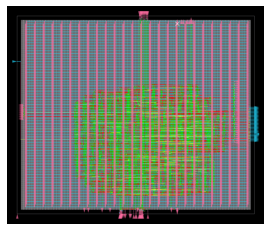

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
core = mpimg.imread('Results/core.png')
#core.shape [:3]
plt.imshow(core)
plt.axis('off')
plt.show()

This is the die image of the top die (Sram Die):

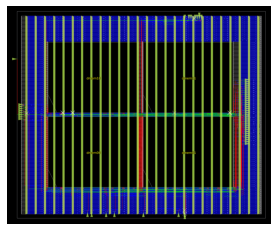

In [35]:
sram = mpimg.imread('Results/sram.png')
#core.shape [:3]
plt.imshow(sram)
plt.axis('off')
plt.show()

## Discussion
We have zoomed in on the detailed images to further demonstrate that the two dies can be coupled. The following two images show the core die using the sky130A process and the cache die using the gf180 process, respectively.

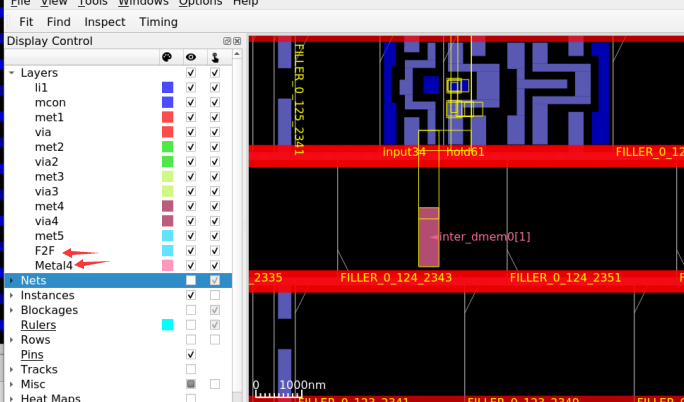

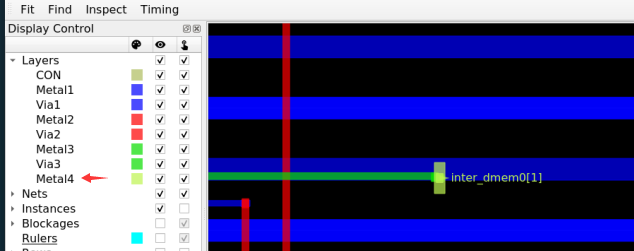

Our objective is to mimic the AMD 3D Vcache model. Both dies have identical footprints, with corresponding signal bonding pads positioned internally within the die.

To simulate their respective real-world conditions as accurately as possible within the entire 3D system, we have conducted separate simulations for the two dies. As you can see, we have modified the BEOL of the core die, with Metal4 parameters derived from the top layer of GF180, while the parameters for the ‘F2F’ via layer are extracted from Kicad simulation results. To avoid potential debugging complexities related to the interaction of two different PDKs, Metal4 is not used for routing in the cache die. Instead, it serves as a bonding layer, where the routing endpoints of both chips converge.